In [1]:
import os
for dirname,_,filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print (os.path.join(dirname,filename))

In [2]:
import pandas as pd
import numpy as np  
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('/content/Historical Product Demand.csv', parse_dates=['Date'])
df.head(100) 


,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500
...,...,...,...,...,...
95,Product_1512,Whse_J,Category_019,2012-06-15,30000
96,Product_1512,Whse_J,Category_019,2012-06-20,30000
97,Product_1512,Whse_J,Category_019,2012-07-04,30000
98,Product_1274,Whse_J,Category_019,2012-06-19,1000


In [3]:
df.dtypes

Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand                object
dtype: object

In [4]:
print(df.isnull().any().sum(), ' / ', len(df.columns))
print(df.isnull().any(axis=1).sum(),'/', len(df))

1  /  5
11239 / 1048575


In [5]:
print (df.isna().sum())

print ('Null to Dataset Ratio for "Dates" Column '': ',df.isnull().sum()[3]/df.shape[0]*100)

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64
Null to Dataset Ratio for "Dates" Column :  1.0718355863910547


In [6]:
df.dropna(axis=0, inplace=True) 
df.reset_index(drop=True)
df.sort_values('Date')[1:50]

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
72252,Product_1724,Whse_A,Category_003,2011-05-31,108
8431,Product_1521,Whse_S,Category_019,2011-06-24,85000
8432,Product_1521,Whse_S,Category_019,2011-06-24,7000
72669,Product_1507,Whse_C,Category_019,2011-09-02,1250
17249,Product_0608,Whse_C,Category_001,2011-09-27,5
17250,Product_1933,Whse_C,Category_001,2011-09-27,23
74615,Product_0875,Whse_C,Category_023,2011-09-30,5450
131426,Product_0125,Whse_S,Category_011,2011-10-20,(2)
131429,Product_0412,Whse_S,Category_007,2011-10-20,(2)
75193,Product_0642,Whse_C,Category_019,2011-10-31,3


In [7]:
df['Order_Demand']=df['Order_Demand'].str.replace('(',"")
df['Order_Demand']=df['Order_Demand'].str.replace(')',"")
df.head(100)
df['Order_Demand'] = df['Order_Demand'].astype('int64')


<ipython-input-7-3b2256d0122c>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Order_Demand']=df['Order_Demand'].str.replace('(',"")
<ipython-input-7-3b2256d0122c>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Order_Demand']=df['Order_Demand'].str.replace(')',"")


In [8]:
df['Date'].min() , df['Date'].max()

(Timestamp('2011-01-08 00:00:00'), Timestamp('2017-01-09 00:00:00'))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


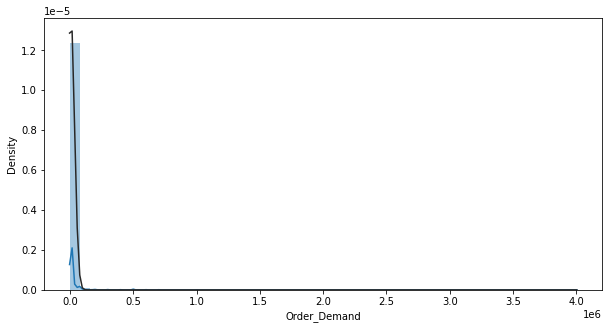

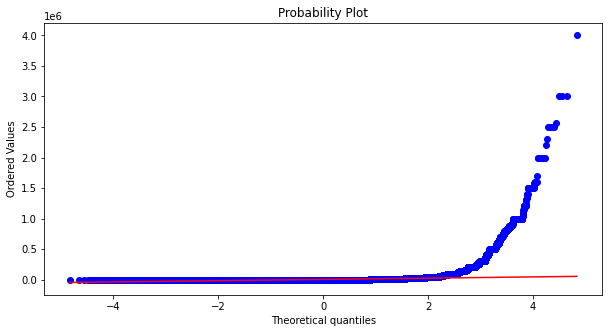

In [9]:
from scipy.stats import norm, skew 
from scipy import stats 
import statsmodels.api as sm 

from statsmodels.tsa.statespace.sarimax import SARIMAX 
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,5

sn.distplot(df['Order_Demand'],fit=norm)

fig = plt.figure()
res = stats.probplot(df['Order_Demand'], plot=plt)
plt.show()

In [10]:
df['Warehouse'].value_counts().sort_values(ascending=False)

Whse_J    764447
Whse_A    142335
Whse_S     88200
Whse_C     42354
Name: Warehouse, dtype: int64

In [11]:
df.groupby('Warehouse').sum().sort_values('Order_Demand', ascending = False)

,Order_Demand
Warehouse,
Whse_J,3363200396
Whse_S,1038024700
Whse_C,585071404
Whse_A,147877431


In [12]:
print(len(df['Product_Category'].value_counts()))
rcParams['figure.figsize']=50,14

33


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

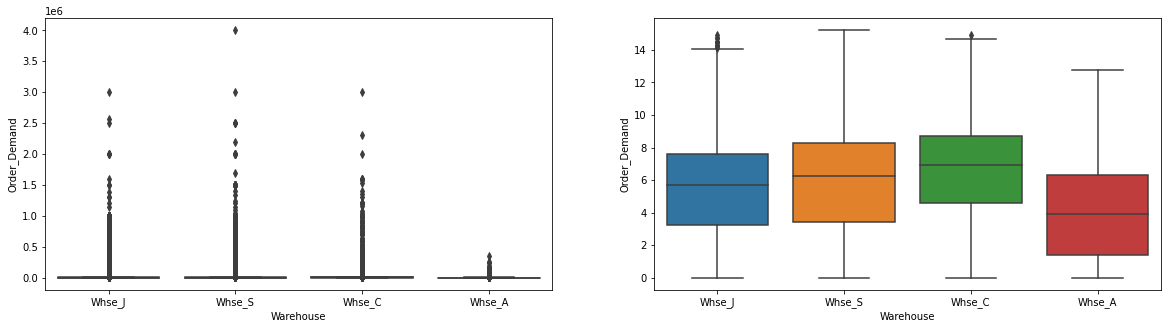

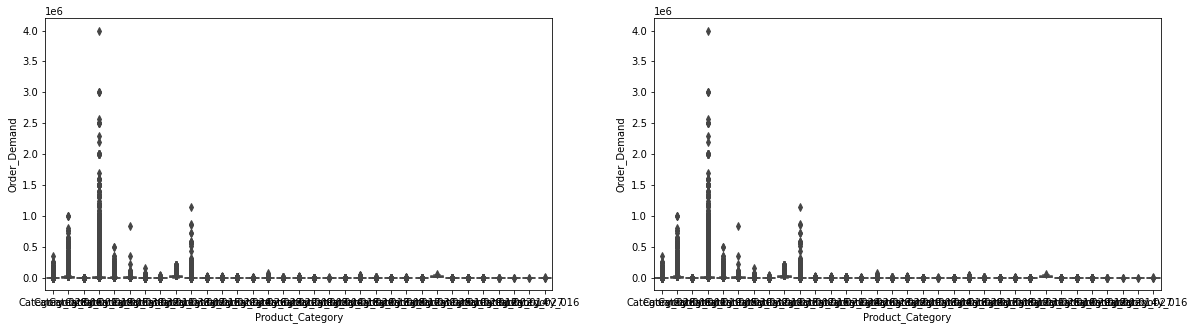

In [13]:
from matplotlib import rcParams

rcParams['figure.figsize']=20,5 
f, axes = plt.subplots(1,2)

regDataWH=sn.boxplot(df['Warehouse'],df['Order_Demand'],ax=axes[0]) 
logDataWH=sn.boxplot(df['Warehouse'],np.log1p(df['Order_Demand']),ax=axes[1]) 

del regDataWH, logDataWH
rcParams['figure.figsize']=20,5
f,axes =plt.subplots(1,2)

regDataPC=sn.boxplot(df['Product_Category'],df['Order_Demand'],ax=axes[0])
logDataPC=sn.boxplot(df['Product_Category'],df['Order_Demand'],ax=axes[1])

del regDataPC, logDataPC


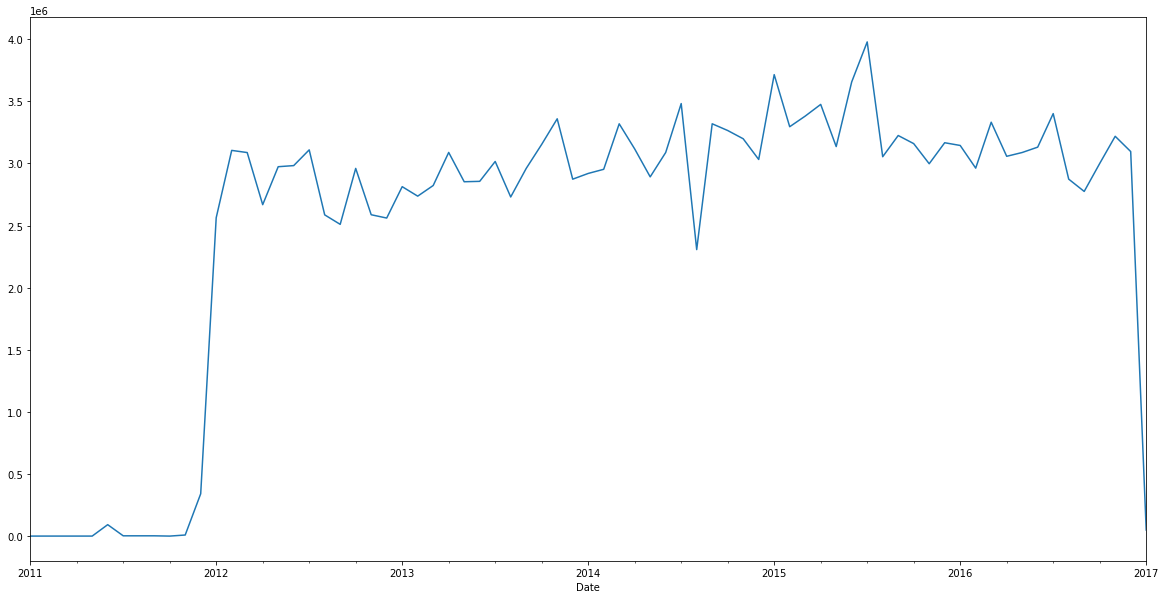

In [14]:
df=df.groupby('Date')['Order_Demand'].sum().reset_index()
df = df.set_index('Date')
df.index 
monthly_avg_sales = df['Order_Demand'].resample('MS').mean()
monthly_avg_sales = monthly_avg_sales.fillna(monthly_avg_sales.bfill())

monthly_avg_sales.plot(figsize=(20,10))
plt.show()

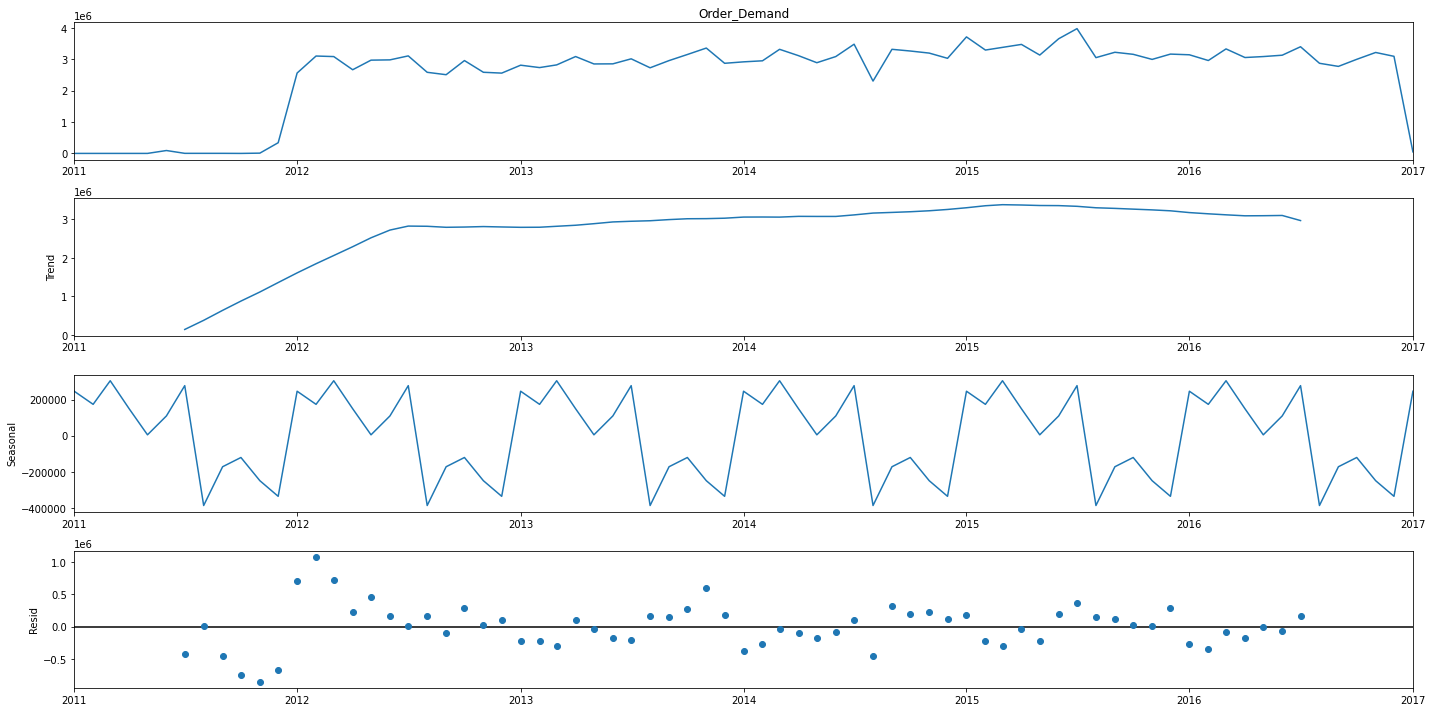

In [15]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 20, 10
decomposition = sm.tsa.seasonal_decompose(monthly_avg_sales, model='additive')
fig = decomposition.plot()
plt.show()

In [16]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('SARIMAX1: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX2: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX3: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX4: {} x {}'.format(pdq[2], seasonal_pdq[4]))

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly_avg_sales,
                                            order=param,
                                            seasonal_order=param_seasonal,enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMAX1: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX2: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX3: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX4: (0, 1, 0) x (1, 0, 0, 12)
SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2344.0704307124033
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1934.192883540221
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1862.6079313938828
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1413.1955930564604
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1897.8374721163148
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1997.2321572752185


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1440.6014550343189
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1414.0578928049888
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2265.2767997773103
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1876.5613755954248
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1790.8025464719374
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1412.3527721130945
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1934.8291713240021
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1872.8686458318643
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1471.9391345294637
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1414.2544026189014
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2081.849011696963
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1728.3815053402648
SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1741.6306755793414
SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1386.1268927048327
SARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1752.2949192972621
SARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1727.5980407023787
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1415.401329526097
SARIMA(0, 1, 0)x(1, 1, 1, 12)12 -

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
mod = sm.tsa.statespace.SARIMAX(monthly_avg_sales,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1130      0.828     -0.137      0.891      -1.736       1.510
ma.L1         -0.6431      0.621     -1.035      0.301      -1.861       0.575
ma.S.L12      -1.0802      0.028    -38.878      0.000      -1.135      -1.026
sigma2      3.708e+11   1.89e-12   1.96e+23      0.000    3.71e+11    3.71e+11


/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


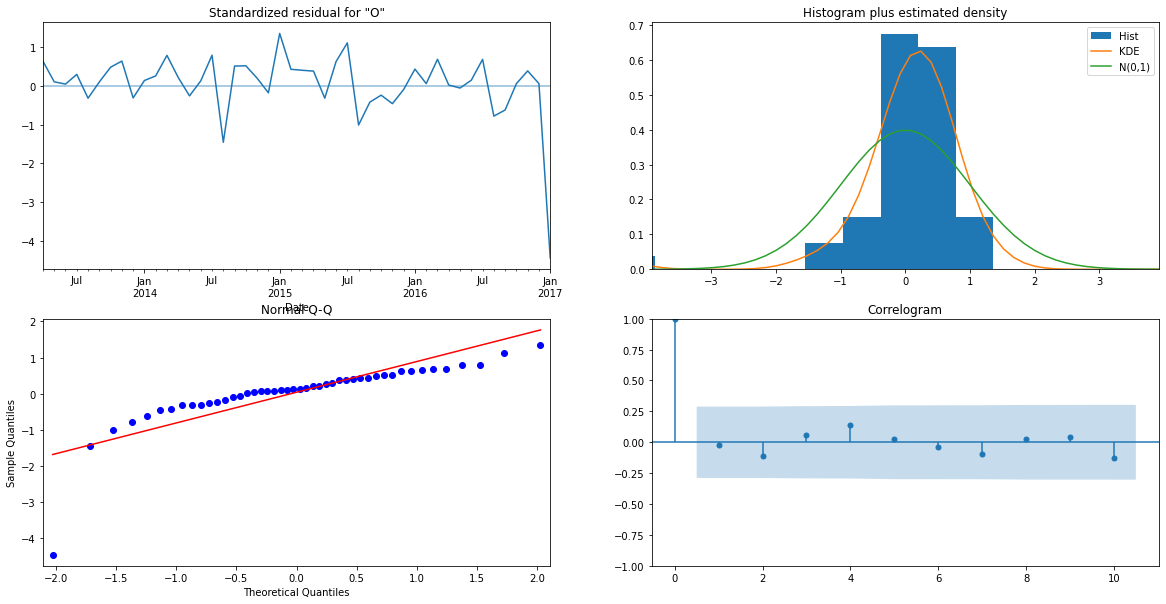

In [18]:
results.plot_diagnostics(figsize=(20, 10))
plt.show()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


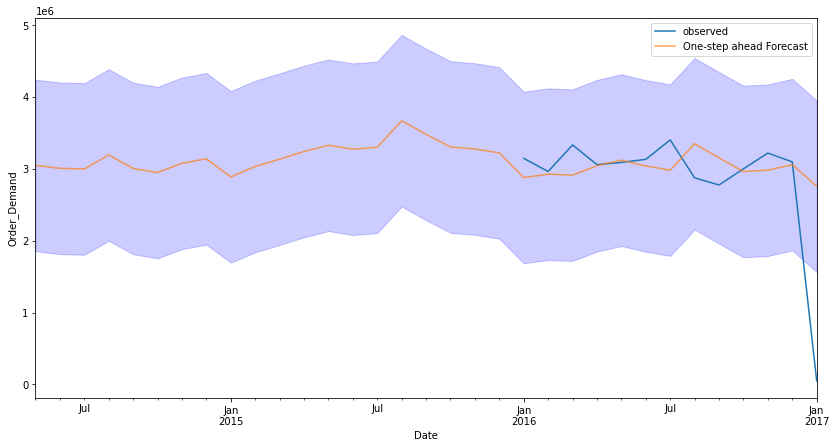

In [19]:
pred = results.get_prediction(start=pd.to_datetime('2014-05-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = monthly_avg_sales['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='blue', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Order_Demand')
plt.legend()
plt.show()

In [20]:
y_forecasted = pred.predicted_mean
y_truth = monthly_avg_sales['2016-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))
print('RMSE: {}'.format(round(np.sqrt(mse), 2)))

MSE 630216377867.63
RMSE: 793861.69


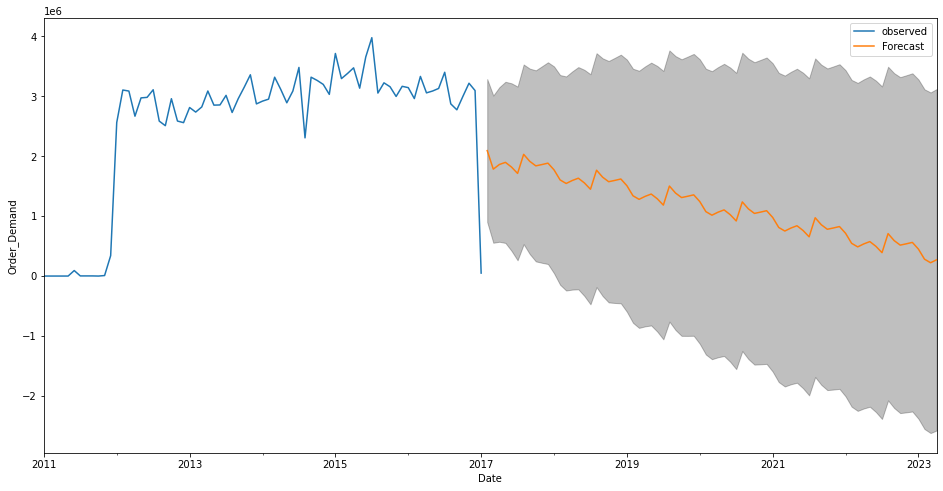

In [21]:
pred_uc = results.get_forecast(steps=75)
pred_ci = pred_uc.conf_int()
ax = monthly_avg_sales.plot(label='observed', figsize=(16, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Order_Demand')
plt.legend()
plt.show()